1 - Collecting All the Data

In [3]:
#All the data stored in files variable
import os 
import pandas as pd
files = os.listdir(r'C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Youtube\additional_data')
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [4]:
#Selecting the csv_files
csv_file = [file for file in files if file.endswith(".csv")]
csv_file

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [5]:
full_df = pd.DataFrame()
path = r'C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Youtube\additional_data'

for file in csv_file:
    current_df = pd.read_csv(path + "/" + file, encoding = "iso-8859-1", on_bad_lines = "skip")

    full_df = pd.concat([full_df, current_df], ignore_index= True)

In [6]:
#Category ids
full_df["category_id"].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44])

In [7]:
json_df = pd.read_json(r"C:\Users\omerf\OneDrive\Masaüstü\Data Analysis Project\Youtube\additional_data/US_category_id.json")

In [8]:
json_df["items"][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [9]:
#Need title from data

cat_dict = {}

for item in json_df["items"]:
    cat_dict[int(item["id"])] = item["snippet"]["title"]

In [10]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [11]:
full_df["category_name"] = full_df["category_id"].map(cat_dict)

2 - Analyzing Whether Audience Engaged or Not

In [12]:
#Percentage of likes , dislikes and comment counts
full_df["like_rate"] = (full_df["likes"] / full_df["views"]) * 100
full_df["dislike_rate"] = (full_df["dislikes"] / full_df["views"]) * 100
full_df["comment_rate"] = (full_df["comment_count"] / full_df["views"]) * 100

C:\Users\omerf\AppData\Local\Temp\ipykernel_9984\1456556759.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "category_name", y = "like_rate", data = full_df, palette="pastel")


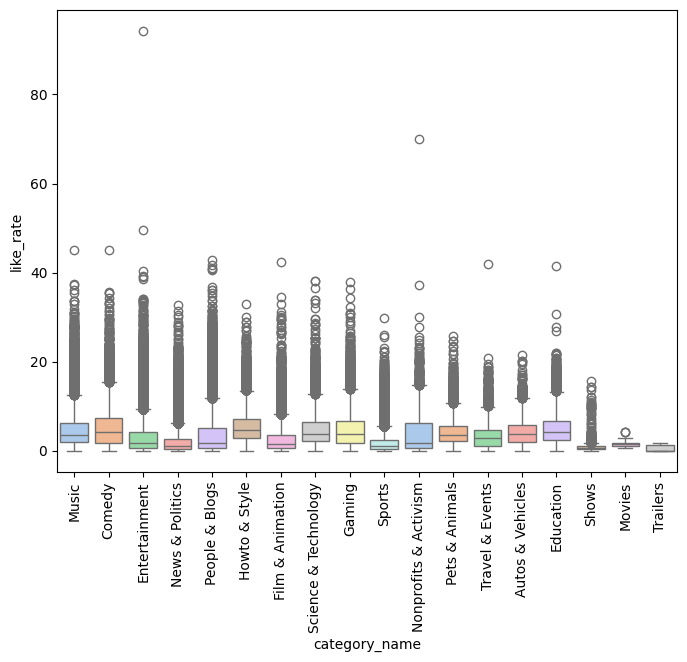

In [13]:
#Like rate for each category 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8 , 6))
sns.boxplot(x = "category_name", y = "like_rate", data = full_df, palette="pastel")
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='views', ylabel='likes'>

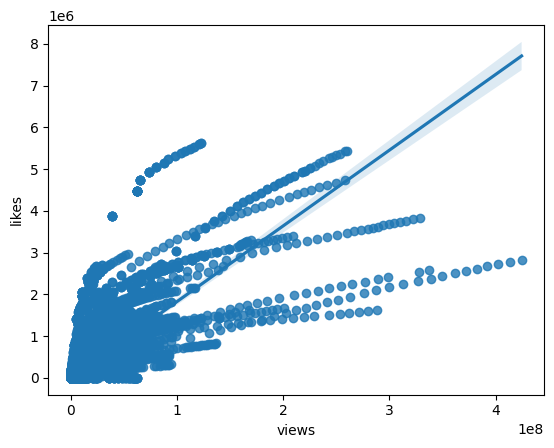

In [14]:
#Regression plot of views by likes
sns.regplot(x = "views", y = "likes", data = full_df)

In [15]:
#Correlation of views, dislikes and likes
full_df[["views", "likes", "dislikes"]].corr()

,views,likes,dislikes
views,1.000000,0.777796,0.421653
likes,0.777796,1.000000,0.453710
dislikes,0.421653,0.453710,1.000000


<Axes: >

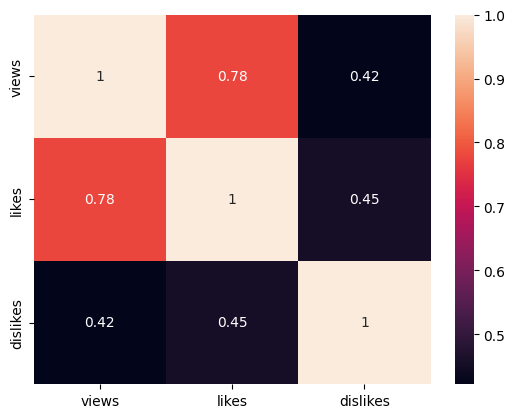

In [16]:
sns.heatmap(full_df[["views", "likes", "dislikes"]].corr(), annot=True)